# Crawling Web Berita CNBC Indonesia

## Apa itu Crawling?

Crawling adalah proses di mana mesin pencari mengunjungi halaman-halaman web untuk menemukan dan mengindeks konten. Dalam proses ini, bot atau robot yang dikenal sebagai "crawler" atau "spider" mengumpulkan informasi dari berbagai halaman web untuk memastikan bahwa konten terbaru dan relevan tersedia dalam indeks mesin pencari.



## Proses Crawling

Pada contoh ini, proses crawling dilakukan pada website CNBC Indonesia untuk mengumpulkan data berita. Artikel-artikel berita akan diambil dari beberapa kategori yang berbeda, seperti Research, News, Tech, dan Market.

## Tool atau libray yang diperlukan

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


- **Requests** digunakan untuk mengambil konten HTML/HTTP dari sebuah website.
- **BeautifulSoup** berfungsi untuk mengurai dan memproses data dari HTML/XML.
- **Pandas** digunakan untuk menyimpan data dalam format yang mudah dibaca dan diproses.

## Code Program

#### Inisialisasi Variabel dan URL

In [2]:
judul = []
tanggal = []
isi = []
url_list = []
kategori_list = []

base_urls = [
    "https://www.cnbcindonesia.com/research/indeks/127/",
    "https://www.cnbcindonesia.com/news/indeks/3/",
    "https://www.cnbcindonesia.com/tech/indeks/12/",
    "https://www.cnbcindonesia.com/market/indeks/5/"
]
categories = [
    "Research",
    "News",
    "Tech",q
    "Market"
]


Variabel-variabel ini digunakan untuk menyimpan data yang akan diambil dari website. `base_urls` adalah daftar URL yang akan dikunjungi untuk mengambil artikel.

#### Proses Pengambilan Data

In [1]:
payload = {'tipe': 'artikel'}

for news, category in zip(base_urls, categories):
    for page in range(1, 11):  # Mengambil dari halaman 1 hingga 10
        url = f"{news}{page}"
        response = requests.get(url, params=payload)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            articles = soup.find_all("article")

            # Menambahkan kategori ke dalam list
            kategori = category  # Menggunakan kategori dari list `categories`

            # Pada kode dibawah ini akan mengunjungi satu persatu artikel yang ada di halaman ke-n
            for article in articles:
                link = article.find("a")["href"]  # Untuk mendapatkan link
                article_response = requests.get(link)
                if article_response.status_code == 200:
                    articleFull = BeautifulSoup(article_response.content, "html.parser")
                    judulArtikel = articleFull.find(
                        "h1", class_="mb-4 text-32 font-extrabold"
                    ).text.strip()  # Untuk mendapatkan judul artikel
                    tanggalArtikel = articleFull.find(
                        "div", class_="text-cm text-gray"
                    ).text.strip()  # Untuk mendapatkan tanggal artikel diterbitkan

                    # Isi artikel terdapat pada tag div dengan class detail-text
                    artikel_element = articleFull.find("div", class_="detail-text")
                    # Mengambil semua isi artikel yang terdapat di tag p
                    artikelTeks = [p.get_text(strip=True) for p in artikel_element.find_all("p")]
                    artikel_content = "\n".join(artikelTeks)

                    # Menambahkan judul, tanggal, isi, dan url ke dalam list yang sudah diinisialisasikan
                    judul.append(judulArtikel)
                    tanggal.append(tanggalArtikel)
                    isi.append(artikel_content)
                    url_list.append(link)
                    kategori_list.append(kategori)
                else:
                    print(f"Error: {article_response.status_code}")
        else:
            print(f"Error : {response.status_code}")


NameError: name 'base_urls' is not defined

Setiap artikel diambil dan data seperti judul, tanggal, dan isi artikel diproses dan disimpan dalam list yang telah disiapkan. Jika ada error dalam pengambilan data, status error akan diprint

##### Mengecek apakahh panjang hasil scrapping sama

In [4]:
print(len(judul), len(tanggal), len(isi), len(url_list), len(kategori_list))

398 398 398 398 398


### Convert data ke dalam csv

In [5]:
# Membuat dataframe dari list data
df = pd.DataFrame({"judul": judul, "tanggal": tanggal, "isi": isi, "url": url_list, "kategori": kategori_list})

# Menyimpan dataframe ke file csv
df.to_csv("data-artikel-cnbc.csv", index=False)

Setelah semua data dikumpulkan, data tersebut disimpan ke dalam sebuah dataframe menggunakan Pandas dan disimpan dalam format CSV untuk analisis lebih lanjut.


In [6]:
df.head()

,judul,tanggal,isi,url,kategori
0,Bukan Kaleng-kaleng! Nilai Skuad Timnas Indone...,09 September 2024 19:30,"Jakarta, CNBC Indonesia -Kedatangan pemain-pem...",https://www.cnbcindonesia.com/research/2024090...,Research
1,"Aset Bank Mandiri Tembus Rp 2.200 T, Paling Ju...",09 September 2024 19:05,"Jakarta, CNBC Indonesia -Sepanjang paruh perta...",https://www.cnbcindonesia.com/research/2024090...,Research
2,Emas Meredup Saat Suku Bunga The Fed Mau Turun...,09 September 2024 18:10,"Jakarta,CNBC Indonesia -Harga emas dunia melem...",https://www.cnbcindonesia.com/research/2024090...,Research
3,"Tetangga RI Dihantam 'Bencana' Iklim, Harga Ba...",09 September 2024 15:55,"Jakarta, CNBC Indonesia -Indeks Harga Konsumen...",https://www.cnbcindonesia.com/research/2024090...,Research
4,"Tantama Hingga Perwira, Ini Urutan Lengkap Pan...",09 September 2024 14:35,"Jakarta, CNBC Indonesia-Tentara Nasional Indon...",https://www.cnbcindonesia.com/research/2024090...,Research


In [3]:
df["kategori"].value_counts()

kategori
Research    100
News        100
Tech        100
Market       98
Name: count, dtype: int64

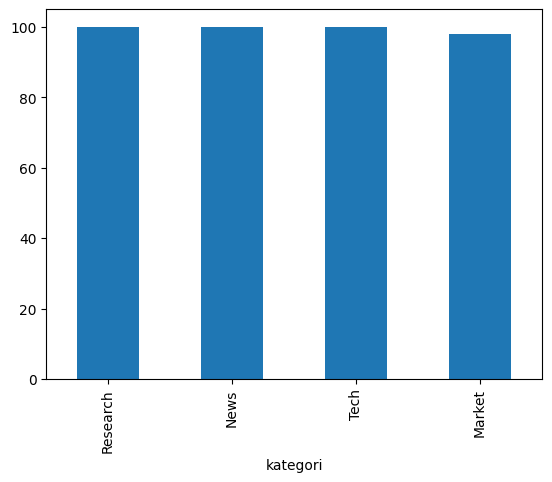

In [7]:
df["kategori"].value_counts().plot(kind="bar")
plt.show()

## Kesimpulan

Dengan menggunakan requests, BeautifulSoup, dan Pandas, kita dapat melakukan web scraping untuk mengumpulkan data dari berbagai halaman web. Ini memungkinkan kita untuk menganalisis data dari website dengan lebih efisien.